In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb


In [2]:
df= pd.read_csv("PJME_hourly.csv")
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Set the 'Datetime' column as the index
df.set_index('Datetime', inplace=True)

# Now you can check the first few rows to confirm the changes
print(df.head())
# df.set_index('Datetime')

                     PJME_MW
Datetime                    
2002-12-31 01:00:00  26498.0
2002-12-31 02:00:00  25147.0
2002-12-31 03:00:00  24574.0
2002-12-31 04:00:00  24393.0
2002-12-31 05:00:00  24860.0


In [3]:
pd.to_datetime(df.index)

DatetimeIndex(['2002-12-31 01:00:00', '2002-12-31 02:00:00',
               '2002-12-31 03:00:00', '2002-12-31 04:00:00',
               '2002-12-31 05:00:00', '2002-12-31 06:00:00',
               '2002-12-31 07:00:00', '2002-12-31 08:00:00',
               '2002-12-31 09:00:00', '2002-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=145366, freq=None)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJME_MW  145366 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


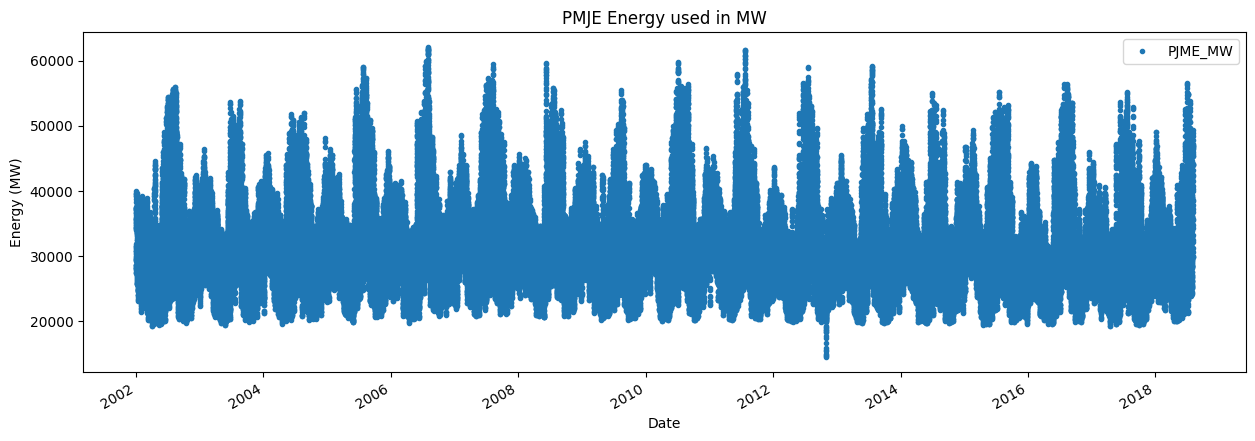

In [5]:
color_pal=sns.color_palette()
ax = df.plot(style='.', figsize=(15, 5), color=color_pal, title='PMJE Energy used in MW')

# Add axis labels
ax.set_xlabel('Date')
ax.set_ylabel('Energy (MW)')

# Show the plot
plt.show()

Train Test / Split


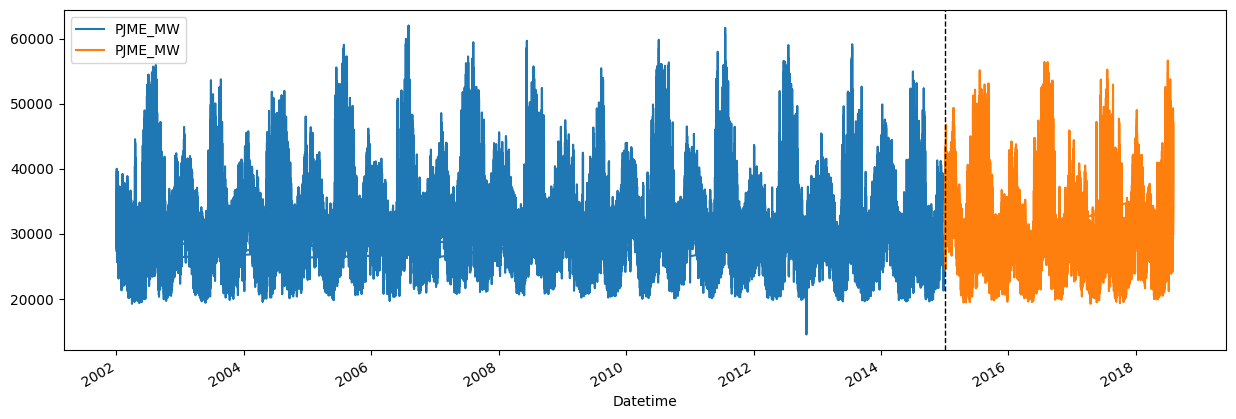

In [6]:


train = df.loc[df.index < '2015-01-01']
test = df.loc[df.index >= '2015-01-01']

fig, ax = plt.subplots(figsize=(15, 5))

train.plot(ax=ax, label='Training set')
test.plot(ax=ax, label='Testing set')

# Adding a black dotted line at '2015-01-01'
ax.axvline(x='2015-01-01', color='black', linestyle='--', linewidth=1)

plt.legend()
plt.show()


FEATURE CREATION


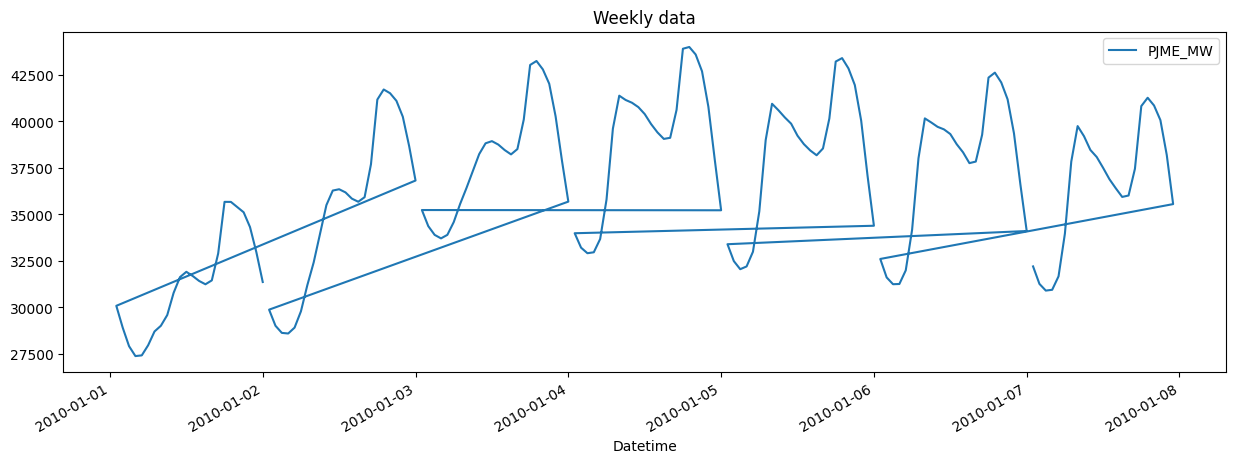

In [7]:
# Filter the data for the specified date range
filtered_data = df.loc[(df.index > '2010-01-01') & (df.index < '2010-01-08')]

# Plot the filtered data
filtered_data.plot(figsize=(15, 5), title='Weekly data')

# Show the plot
plt.show()

Feature creation


In [8]:
def create_features(df):
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['day_of_year'] = df.index.dayofyear
    return df


In [9]:
df=  create_features(df)

Visualize our Feature / Target Relationship

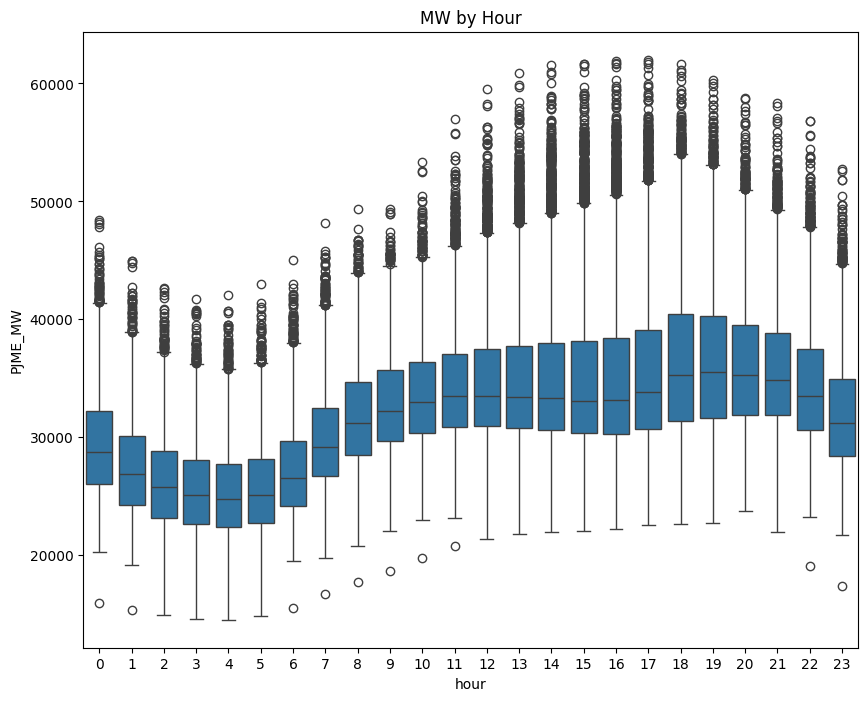

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='PJME_MW', ax=ax)
ax.set_title('MW by Hour')
plt.show()


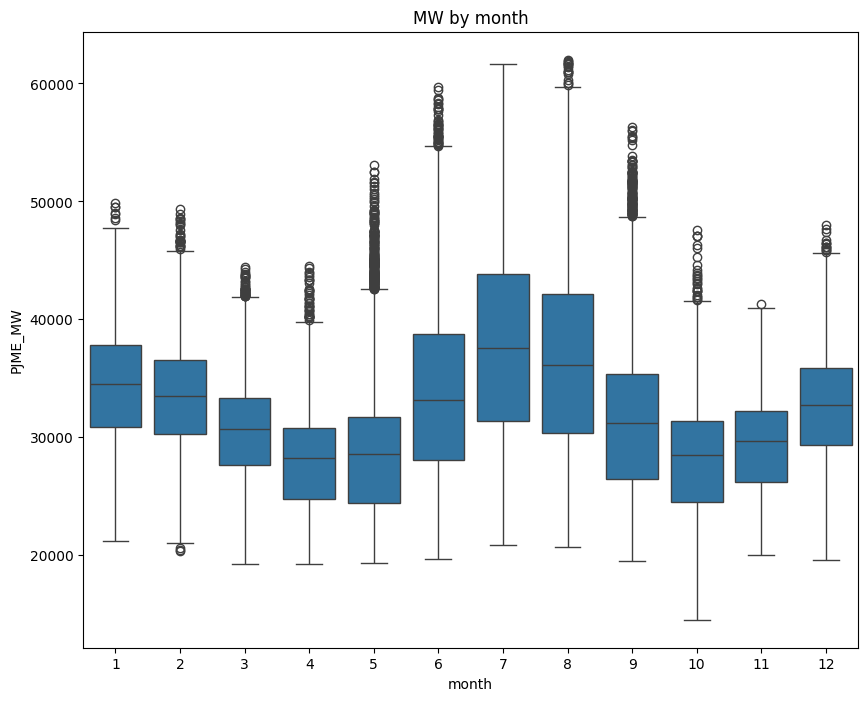

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='PJME_MW', ax=ax)
ax.set_title('MW by month')
plt.show()


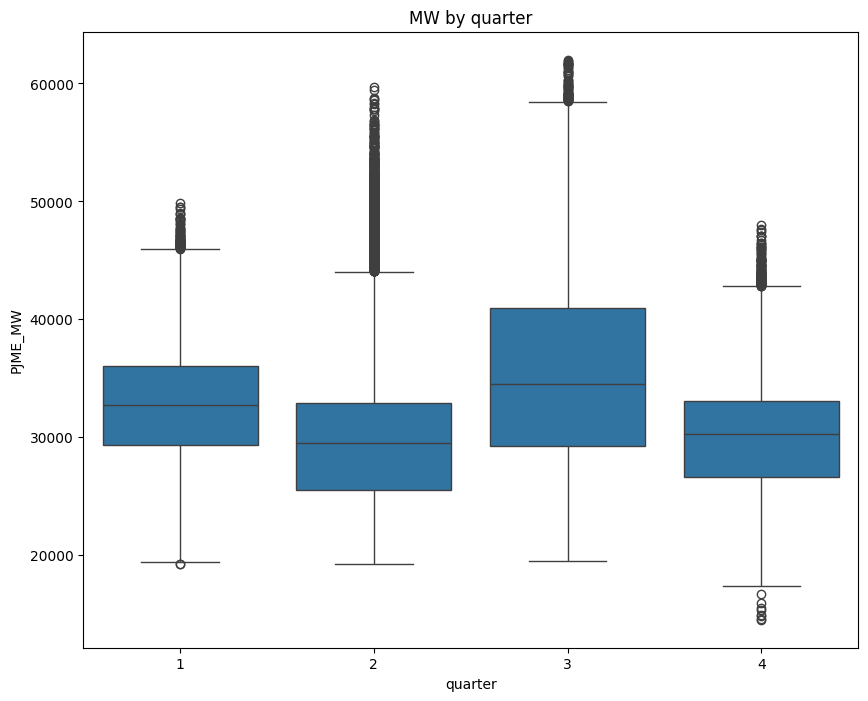

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='quarter', y='PJME_MW', ax=ax)
ax.set_title('MW by quarter')
plt.show()


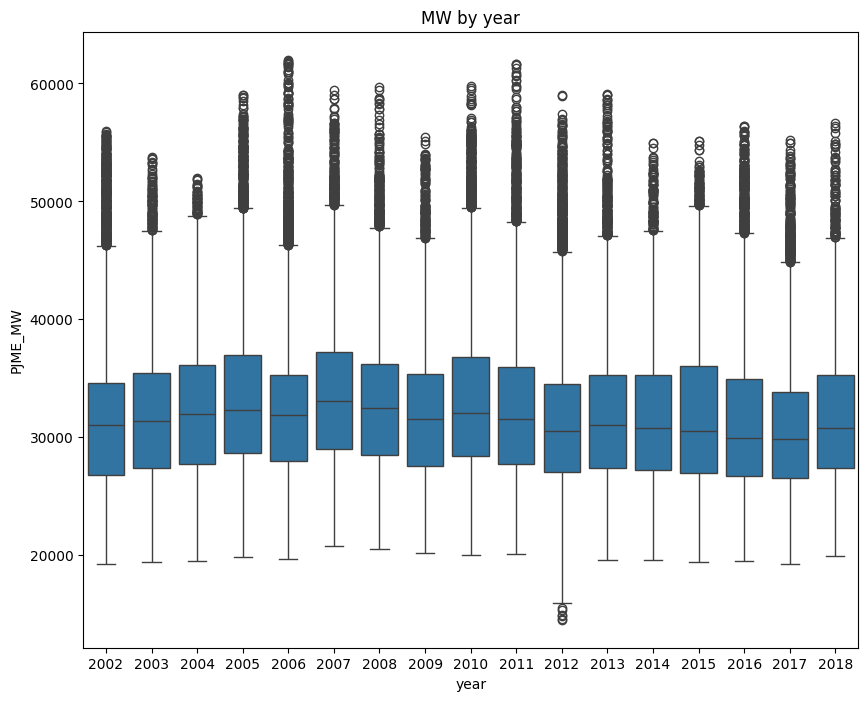

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='year', y='PJME_MW', ax=ax)
ax.set_title('MW by year')
plt.show()


Create the model

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
train = create_features(train)
test = create_features(test)
Features = ['hour', 'day_of_week', 'quarter', 'month', 'year', 'day_of_year']
Target = 'PJME_MW'

C:\Users\karth\AppData\Local\Temp\ipykernel_19760\2179732885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
C:\Users\karth\AppData\Local\Temp\ipykernel_19760\2179732885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df.index.dayofweek
C:\Users\karth\AppData\Local\Temp\ipykernel_19760\2179732885.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [16]:
X_train = train[Features]
y_train = train[Target]

X_test = test[Features]
y_test = test[Target]

In [17]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50, learning_rate= 0.01)

# Fit the model
reg.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=True)

# Predict and evaluate
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

[0]	validation_0-rmse:6407.35736	validation_1-rmse:6479.81619
[1]	validation_0-rmse:6363.01592	validation_1-rmse:6438.46762
[2]	validation_0-rmse:6319.31204	validation_1-rmse:6397.84624
[3]	validation_0-rmse:6276.10095	validation_1-rmse:6358.15224
[4]	validation_0-rmse:6233.47267	validation_1-rmse:6319.19260
[5]	validation_0-rmse:6191.44103	validation_1-rmse:6281.02309
[6]	validation_0-rmse:6149.92226	validation_1-rmse:6243.13500
[7]	validation_0-rmse:6109.00344	validation_1-rmse:6206.10246
[8]	validation_0-rmse:6068.55090	validation_1-rmse:6168.76078
[9]	validation_0-rmse:6028.63852	validation_1-rmse:6132.63405
[10]	validation_0-rmse:5989.31481	validation_1-rmse:6096.99961
[11]	validation_0-rmse:5950.47167	validation_1-rmse:6061.95679
[12]	validation_0-rmse:5911.75590	validation_1-rmse:6027.04791
[13]	validation_0-rmse:5873.58600	validation_1-rmse:5992.93845
[14]	validation_0-rmse:5835.89024	validation_1-rmse:5959.05318
[15]	validation_0-rmse:5799.03022	validation_1-rmse:5926.17692
[1

In [18]:
f1 = pd.DataFrame(data=reg.feature_importances_, 
                  index=reg.feature_names_in_, 
                  columns=['importance'])

In [19]:
f1

,importance
hour,0.463878
day_of_week,0.162005
quarter,0.028881
month,0.203161
year,0.023824
day_of_year,0.118251


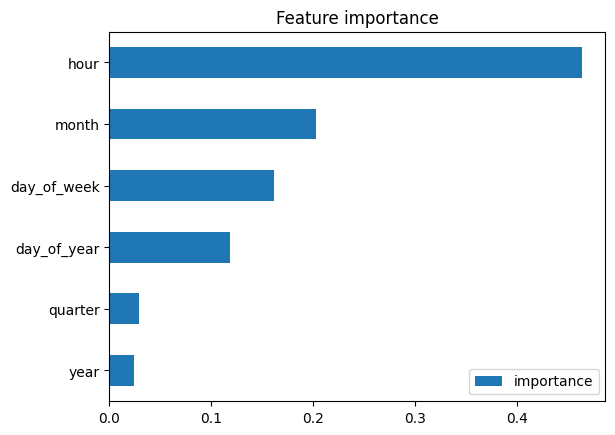

In [20]:
f1.sort_values('importance').plot(kind='barh', title=('Feature importance'))
plt.show()

Forecast on test

In [21]:
test['prediction'] = reg.predict(X_test)

C:\Users\karth\AppData\Local\Temp\ipykernel_19760\2903689382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


In [22]:
df.merge(test['prediction'], how='left', left_index=True, right_index=True)

,PJME_MW,hour,day_of_week,quarter,month,year,day_of_year,prediction
Datetime,,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365,NaN
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365,NaN
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365,NaN
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365,NaN
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365,NaN
...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,20,0,1,1,2018,1,38623.246094
2018-01-01 21:00:00,43751.0,21,0,1,1,2018,1,38495.484375
2018-01-01 22:00:00,42402.0,22,0,1,1,2018,1,36229.527344


C:\Users\karth\AppData\Local\Temp\ipykernel_19760\1976857044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(X_test)


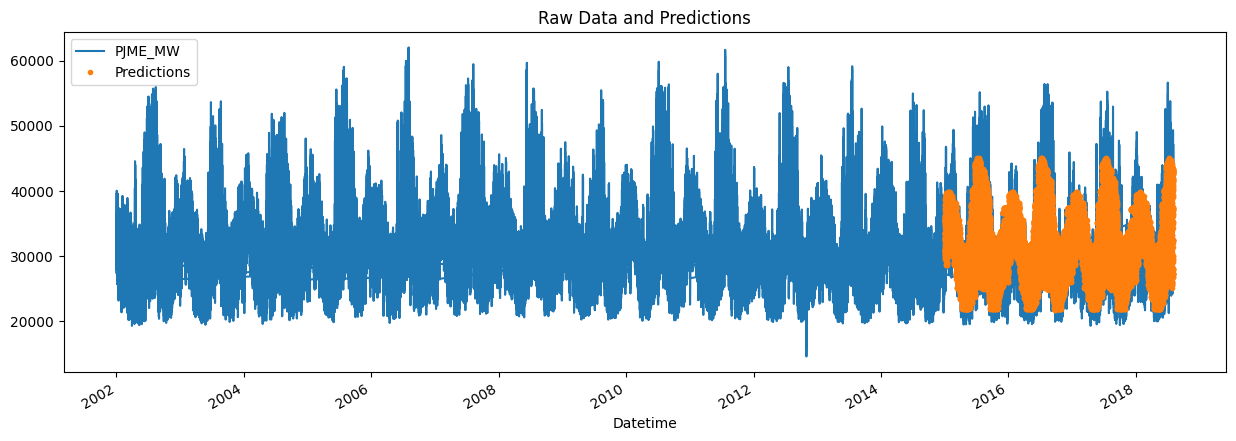

In [23]:
test['prediction'] = reg.predict(X_test)


df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

fig, ax = plt.subplots(figsize=(15, 5))
df[['PJME_MW']].plot(ax=ax, label='Truth Data')
df['prediction'].plot(ax=ax, style='.', label='Predictions')


ax.set_title('Raw Data and Predictions')
ax.legend()

plt.show()

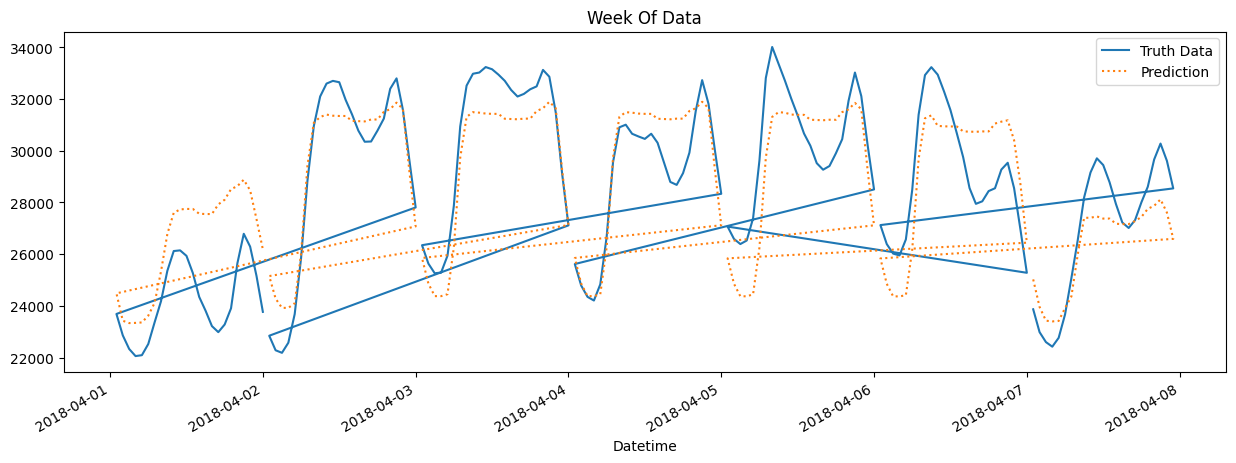

In [24]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['PJME_MW'].plot(figsize=(15, 5), title='Week Of Data')

df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['prediction'] .plot(style=':')

plt.legend(['Truth Data', 'Prediction'])
plt.show()

In [25]:
score =np.sqrt(mean_squared_error(test['PJME_MW'], test['prediction']))
print(f'rmse score:{score:0.2f}')

rmse score:3741.03


calculate error

In [26]:
test['error']=np.abs(test[Target]-test['prediction'])
test['date']=test.index.date
test.groupby('date')['error'].mean().sort_values(ascending=False).head(5)

C:\Users\karth\AppData\Local\Temp\ipykernel_19760\3976115228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['error']=np.abs(test[Target]-test['prediction'])
C:\Users\karth\AppData\Local\Temp\ipykernel_19760\3976115228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['date']=test.index.date


date
2016-08-13    13829.866211
2016-08-14    13577.304362
2016-09-10    11235.855143
2016-09-09    11032.220215
2016-08-12    10667.820312
Name: error, dtype: float64